# Neural Network for Binaural Localization
### Stage1:
- This stage only uses amplitude measurement data
- The data were recorded by using the `logger` script with arduino controlled sound source

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print('Tensorflow version:',tf.__version__)

Tensorflow version: 2.1.0


## 1.0 Preprocessing

In [2]:
# Importing the data from a CSV as a numpy array
raw_data = np.genfromtxt('data_for_NN_Final.csv', delimiter=',')
print("Shape of Data:", raw_data.shape)

Shape of Data: (1199, 3)


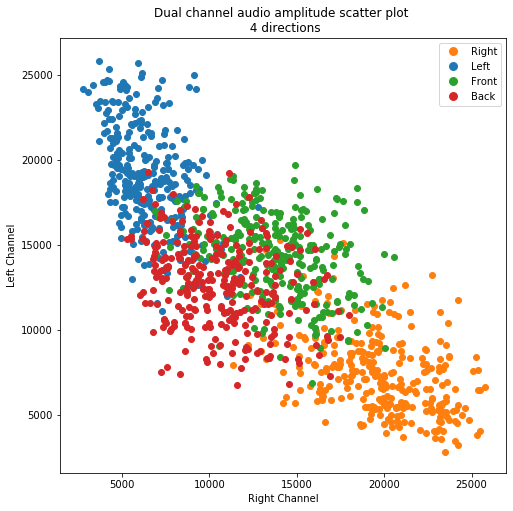

In [3]:
# Visualize the data
colors = ['tab:orange', 'tab:blue', 'tab:green', 'tab:red']
legend_names = ['Right','Left','Front','Back']

fig, ax = plt.subplots(figsize=(8,8))
for i in range(len(raw_data)):
    col = colors[int(raw_data[i,2])]
    x = raw_data[i,0]
    y = raw_data[i,1]
    ax.scatter(x, y, c=col)

legend_elements = []
for i in range(4):
    legend_elements.append(Line2D([0],[0], marker='o', color='w', label=legend_names[i],
                           markerfacecolor=colors[i], markersize=10))

ax.set_title('Dual channel audio amplitude scatter plot \n 4 directions')
ax.set_xlabel('Right Channel')
ax.set_ylabel('Left Channel')
ax.legend(handles=legend_elements)
plt.show()

In [4]:
# Data reshaping
labels=[]
for i in range(len(raw_data)):
    labels.append(int(raw_data[i,2]))
labels = np.asarray(labels)
data = np.delete(raw_data, 2, 1) #delete the last column

print(' data.shape:',data.shape,'\n','labels.shape: ',labels.shape)

 data.shape: (1199, 2) 
 labels.shape:  (1199,)


In [5]:
# Standardizing
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [6]:
# Spliting the data into train,test and validation
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, test_size=0.2, shuffle=True)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, shuffle=True)

print('Train samples =', train_data.shape)
print('Test samples', test_data.shape)
print('Validation samples', val_data.shape)

Train samples = (767, 2)
Test samples (240, 2)
Validation samples (192, 2)


## 2.0 `Build`, `Compile` and `Train` the Neural Network

In [7]:
model = tf.keras.Sequential([tf.keras.layers.Dense(4, input_shape=(2,), activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(train_data, train_labels, verbose=0,
              validation_data=(val_data, val_labels),
              epochs=200)

### 2.1 Test the model accuracy on the `test_data`

In [8]:
loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print("Accuracy on test_data: {:.2%}".format(accuracy))

Accuracy on test_data: 78.75%


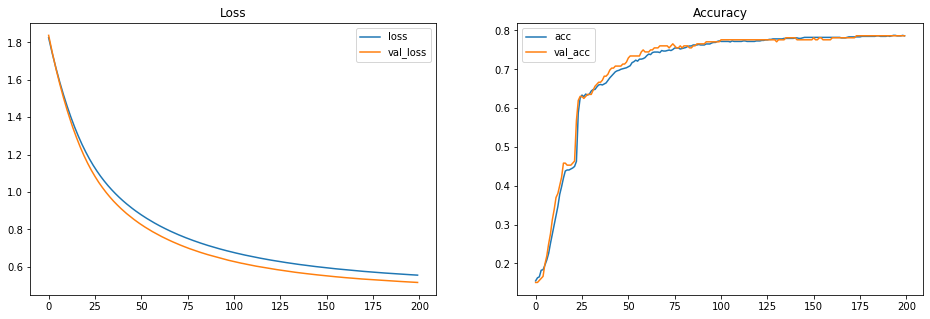

In [9]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.plot(r.history['loss'], label='loss')
ax1.plot(r.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("Loss")
ax2.plot(r.history['accuracy'], label='acc')
ax2.plot(r.history['val_accuracy'], label='val_acc')
ax2.set_title("Accuracy")
ax2.legend()
plt.show()

## 3.0 Make predictions

In [10]:
predictions = model.predict(test_data)
class_names = ['LEFT','RIGHT','FRONT','BACK']

In [16]:
for i in range(10):
    a = np.random.randint(len(predictions))
    idx = np.argmax(predictions[a])
    if class_names[idx] != class_names[test_labels[a]]: s = '🔸'
    else: s = ""
    print("{:<4}Prediction: {:<7}{:.3%}  Real: {:>5}".format(a, class_names[idx], predictions[a,idx], class_names[test_labels[a]]), s)

142 Prediction: LEFT   71.835%  Real:  LEFT 
100 Prediction: FRONT  72.294%  Real: FRONT 
183 Prediction: RIGHT  81.184%  Real: RIGHT 
38  Prediction: LEFT   99.290%  Real:  LEFT 
238 Prediction: RIGHT  44.571%  Real: FRONT 🔸
66  Prediction: LEFT   97.719%  Real:  LEFT 
131 Prediction: RIGHT  58.996%  Real: RIGHT 
100 Prediction: FRONT  72.294%  Real: FRONT 
26  Prediction: RIGHT  41.236%  Real:  BACK 🔸
30  Prediction: FRONT  44.090%  Real: FRONT 


## 4.0 Saving and Loading the Model

In [12]:
model.save('Trained_Models/4_DirectionClassifier.h5')

In [13]:
model = tf.keras.models.load_model('Trained_Models/4_DirectionClassifier.h5')

loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
print("Accuracy on test_data: {:.2%}".format(accuracy))

Accuracy on test_data: 78.75%


## 5.0 Model Summery

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
